In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)

Variables/Columns
TIME: Time from pour (seconds)  4-8
FOAM: Wet foam height (cm)  10-16
BEER: Beer height (cm)    18-24

**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?


In [3]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('Data/fullDataSet.csv')
data
#removed all NULLS, removed 60654/60642, removed outlier zips (60601, 60602, 60603, 60604)

,Unnamed: 0,long_date,Zip,total_num_crimes,crimes_per_capita,total_num_noise,month_year,median_listing_price,active_listing_count,median_days_on_market,...,Rests_Per_Capita,starbucks_stores,Sbucks_Per_Capita,Public_Prop_Ct,Public_Prop_Per_Capita,Grocery_Store_Count,Grocery_Store_Per_Capita,Premium_Grocer,DOW_Close,30yr_Rates
0,0,1/1/2017,60605,5,0.000402,5,201701,419800.0,108,66.5,...,0.014167,4,0.000322,40,0.003220,3,0.000241,1,19864.09,4.15
1,1,1/1/2017,60607,13,0.000836,13,201701,539050.0,73,61.0,...,0.027610,6,0.000386,92,0.005916,3,0.000193,1,19864.09,4.15
2,2,1/1/2017,60608,18,0.000195,18,201701,292300.0,66,66.0,...,0.034372,1,0.000011,344,0.003720,14,0.000151,0,19864.09,4.15
3,3,1/1/2017,60609,13,0.000164,13,201701,169500.0,47,61.0,...,0.017065,1,0.000013,1640,0.020637,5,0.000063,0,19864.09,4.15
4,4,1/1/2017,60610,43,0.000905,43,201701,650050.0,270,76.0,...,0.017629,13,0.000274,57,0.001200,7,0.000147,1,19864.09,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,2663,12/1/2019,60647,33,0.000334,33,201912,525000.0,172,51.5,...,0.034694,4,0.000041,125,0.001266,15,0.000152,0,28538.44,3.72
1694,2667,12/1/2019,60653,3,0.000087,3,201912,372450.0,105,59.5,...,0.006601,0,0.000000,780,0.022607,2,0.000058,0,28538.44,3.72
1695,2670,12/1/2019,60656,4,0.000147,4,201912,287050.0,69,62.0,...,0.004105,1,0.000037,3,0.000111,2,0.000074,0,28538.44,3.72
1696,2671,12/1/2019,60657,11,0.000165,11,201912,486300.0,337,58.0,...,0.035579,7,0.000105,22,0.000329,7,0.000105,1,28538.44,3.72


In [4]:
data = data.dropna(how='any')

In [7]:
# All Data

X = data[[ "total_num_crimes", "Income", "Bus_Stop_Per_Capita","311_Per_Capita", "Liquor_License_Per_Capita", "total_num_noise","School_rating", "L_Stop_Per_Capita","Rat_Per_Capita", "Pothole_Per_Capita", "Rests_Per_Capita", "Sbucks_Per_Capita", "Public_Prop_Per_Capita", "Grocery_Store_Per_Capita",  "DOW_Close", "30yr_Rates", "Premium_Grocer"]]
y = data['median_listing_price_per_square_foot'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1698, 17) (1698, 1)


In [6]:
#Test Data Only
X = data[[ "crimes_per_capita", "Income", "Bus_Stop_Per_Capita","311_Per_Capita", "Liquor_License_Per_Capita", "total_num_noise","School_rating", "L_Stop_Per_Capita","Rat_Per_Capita", "Pothole_Per_Capita", "Rests_Per_Capita", "Sbucks_Per_Capita", "Public_Prop_Per_Capita", "Grocery_Store_Per_Capita",  "DOW_Close", "30yr_Rates", "Premium_Grocer"]]
y = data['median_listing_price_per_square_foot'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1698, 17) (1698, 1)


In [8]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [9]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [10]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9031800629586866
Testing Score: 0.8957754022916498


Text(0.5, 1.0, 'Residual Plot')

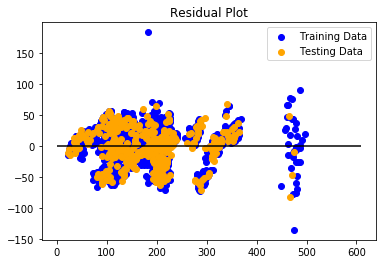

In [11]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [12]:
model.predict(X)

array([[297.17924124],
       [337.19954483],
       [192.01015077],
       ...,
       [197.46528281],
       [286.92213896],
       [160.50699085]])

In [13]:
model.predict(X[0:1])


array([[297.17924124]])

In [14]:
importance = model.coef_
feature_names = X.columns
modelDict = {"Feature_Names": feature_names, "Coefficients": importance[0]}
modelDetail = pd.DataFrame(modelDict)
modelDetail 

# for feat in feature_names:
# 	print(f'Feature: 'feat.coef_', Score: %.5f' % (i,v))
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))

,Feature_Names,Coefficients
0,total_num_crimes,0.371551
1,Income,0.000885
2,Bus_Stop_Per_Capita,5368.158650
3,311_Per_Capita,5.787839
4,Liquor_License_Per_Capita,-881.331190
5,total_num_noise,0.371540
6,School_rating,11.226481
7,L_Stop_Per_Capita,15647.014044
8,Rat_Per_Capita,-660.131489
9,Pothole_Per_Capita,-496.637499


In [15]:
data["predictions"] =  model.predict(X)
data

,Unnamed: 0,long_date,Zip,total_num_crimes,crimes_per_capita,total_num_noise,month_year,median_listing_price,active_listing_count,median_days_on_market,...,starbucks_stores,Sbucks_Per_Capita,Public_Prop_Ct,Public_Prop_Per_Capita,Grocery_Store_Count,Grocery_Store_Per_Capita,Premium_Grocer,DOW_Close,30yr_Rates,predictions
0,0,1/1/2017,60605,5,0.000402,5,201701,419800.0,108,66.5,...,4,0.000322,40,0.003220,3,0.000241,1,19864.09,4.15,297.179241
1,1,1/1/2017,60607,13,0.000836,13,201701,539050.0,73,61.0,...,6,0.000386,92,0.005916,3,0.000193,1,19864.09,4.15,337.199545
2,2,1/1/2017,60608,18,0.000195,18,201701,292300.0,66,66.0,...,1,0.000011,344,0.003720,14,0.000151,0,19864.09,4.15,192.010151
3,3,1/1/2017,60609,13,0.000164,13,201701,169500.0,47,61.0,...,1,0.000013,1640,0.020637,5,0.000063,0,19864.09,4.15,93.332827
4,4,1/1/2017,60610,43,0.000905,43,201701,650050.0,270,76.0,...,13,0.000274,57,0.001200,7,0.000147,1,19864.09,4.15,282.739443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,2663,12/1/2019,60647,33,0.000334,33,201912,525000.0,172,51.5,...,4,0.000041,125,0.001266,15,0.000152,0,28538.44,3.72,201.483109
1694,2667,12/1/2019,60653,3,0.000087,3,201912,372450.0,105,59.5,...,0,0.000000,780,0.022607,2,0.000058,0,28538.44,3.72,100.406442
1695,2670,12/1/2019,60656,4,0.000147,4,201912,287050.0,69,62.0,...,1,0.000037,3,0.000111,2,0.000074,0,28538.44,3.72,197.465283
1696,2671,12/1/2019,60657,11,0.000165,11,201912,486300.0,337,58.0,...,7,0.000105,22,0.000329,7,0.000105,1,28538.44,3.72,286.922139


In [16]:
  data.dropna(subset = ["Unnamed: 0"], inplace=True) 

In [17]:
data.to_csv("Data\TableauDataSet.csv")

PermissionError: [Errno 13] Permission denied: 'Data\\TableauDataSet.csv'

In [18]:
import scipy.stats as st
median_price = pd.DataFrame(data[["Zip","median_listing_price_per_square_foot"]])
med_price = median_price.groupby(["Zip"]).mean()
result = pd.merge(med_price, data, on='Zip')
result = result[["Zip", "median_listing_price_per_square_foot_x", "Income", "Bus_Stop_Per_Capita","311_Per_Capita", "Liquor_License_Per_Capita","School_rating", "L_Stop_Per_Capita","Rat_Per_Capita", "Pothole_Per_Capita", "Rests_Per_Capita", "Sbucks_Per_Capita", "Public_Prop_Per_Capita", "Grocery_Store_Per_Capita", "Premium_Grocer"]]
#above is missing Dow/30yr/crime/noise
for_corre = result.drop_duplicates()
features = for_corre.columns
med_list_price = for_corre.iloc[:,1]
income = for_corre.iloc[:,2]
bus_stop = for_corre.iloc[:,3]
service = for_corre.iloc[:,4]
liquor = for_corre.iloc[:,5]
school = for_corre.iloc[:,6]
l_stop = for_corre.iloc[:,7]
rats = for_corre.iloc[:,8]
potholes = for_corre.iloc[:,9]
restaurants = for_corre.iloc[:,10]
starbucks = for_corre.iloc[:,11]
public_property = for_corre.iloc[:,12]
grocery = for_corre.iloc[:,13]
premium_grocery = for_corre.iloc[:,14]
corre = for_corre[["Income", "Bus_Stop_Per_Capita","311_Per_Capita", "Liquor_License_Per_Capita","School_rating", "L_Stop_Per_Capita","Rat_Per_Capita", "Pothole_Per_Capita", "Rests_Per_Capita", "Sbucks_Per_Capita", "Public_Prop_Per_Capita", "Grocery_Store_Per_Capita", "Premium_Grocer"]]

print(f"The correlation between income and Price Per SQ FT is {st.pearsonr(income, med_list_price)}")
print(f"The correlation between bus stops and Price Per SQ FT is {st.pearsonr(bus_stop, med_list_price)}")
print(f"The correlation between 311 requests and Price Per SQ FT is {st.pearsonr(service, med_list_price)}")
print(f"The correlation between liquor licenses and Price Per SQ FT is {st.pearsonr(liquor, med_list_price)}")
print(f"The correlation between school rating and Price Per SQ FT is {st.pearsonr(school, med_list_price)}")
print(f"The correlation between L train stops and Price Per SQ FT is {st.pearsonr(l_stop, med_list_price)}")
print(f"The correlation between 311 rats requests and Price Per SQ FT is {st.pearsonr(rats, med_list_price)}")
print(f"The correlation between 311 pot hole requests and Price Per SQ FT is {st.pearsonr(potholes, med_list_price)}")
print(f"The correlation between restuarants and Price Per SQ FT is {st.pearsonr(restaurants, med_list_price)}")
print(f"The correlation between starbucks and Price Per SQ FT is {st.pearsonr(starbucks, med_list_price)}")
print(f"The correlation between public property and Price Per SQ FT is {st.pearsonr(public_property, med_list_price)}")
print(f"The correlation between grocery stores and Price Per SQ FT is {st.pearsonr(grocery, med_list_price)}")
print(f"The correlation between premium grocery stores and Price Per SQ FT is {st.pearsonr(premium_grocery, med_list_price)}")

The correlation between income and Price Per SQ FT is (0.46919430525822425, 0.005878203162354944)
The correlation between bus stops and Price Per SQ FT is (0.5463673501286492, 0.00100369975778913)
The correlation between 311 requests and Price Per SQ FT is (0.2916621880073785, 0.09957900998795446)
The correlation between liquor licenses and Price Per SQ FT is (0.5625071352623726, 0.0006560269863357025)
The correlation between school rating and Price Per SQ FT is (0.6345209017101066, 7.318686773436105e-05)
The correlation between L train stops and Price Per SQ FT is (0.5470717311923112, 0.0009856812021898048)
The correlation between 311 rats requests and Price Per SQ FT is (-0.3006231774316083, 0.08914282661346376)
The correlation between 311 pot hole requests and Price Per SQ FT is (-0.21616048637115554, 0.22696444386908807)
The correlation between restuarants and Price Per SQ FT is (0.35708985517951236, 0.041346210586294646)
The correlation between starbucks and Price Per SQ FT is (0.